# Tugas Praktikum
Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

#### Instruksi Umum:

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.


### Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

4. Lakukan feature scaling jika diperlukan.

5. Buat model multiple linear regression menggunakan Scikit-Learn.

6. Latih model pada data latih dan lakukan prediksi pada data uji.

7. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.


#### Catatan Tambahan:
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

### Pengerjaan:

##### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [1]:
# Import library NumPy dan Pandas yang digunakan untuk manipulasi data
import numpy as np
import pandas as pd

In [2]:
# Baca data dari file CSV dengan menggunakan pandas
data = pd.read_csv('insurance.csv')

# Menampilkan data awal dan informasi data untuk melihat gambaran data
print(data.head())
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


> </br> Dataset ini berisi informasi terkait biaya medis personal yang terdiri dari beberapa fitur seperti:
>- **age**     : Usia dari individu (variabel numerik).
>- **sex**     : Jenis kelamin individu (male/female).
>- **bmi**     : Body Mass Index (variabel numerik) yang menunjukkan tingkat kesehatan seseorang berdasarkan berat dan tinggi.
>- **children**: Jumlah anak yang dimiliki oleh individu (variabel numerik).
>- **smoker**  : Status perokok (yes/no).
>- **region**  : Wilayah tempat tinggal individu (northeast, northwest, southeast, southwest).
>- **charges** : Biaya medis yang dikeluarkan, yang merupakan variabel target (variabel numerik).
> </br> </br>

In [3]:
# Import library yang diperlukan
from sklearn.preprocessing import LabelEncoder

# Melakukan encoding pada data kategorikal maupun non numerik
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# Menampilkan data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


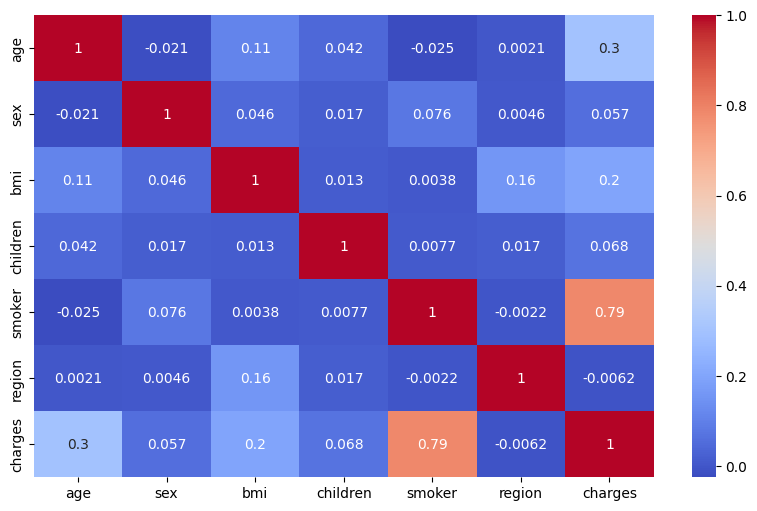

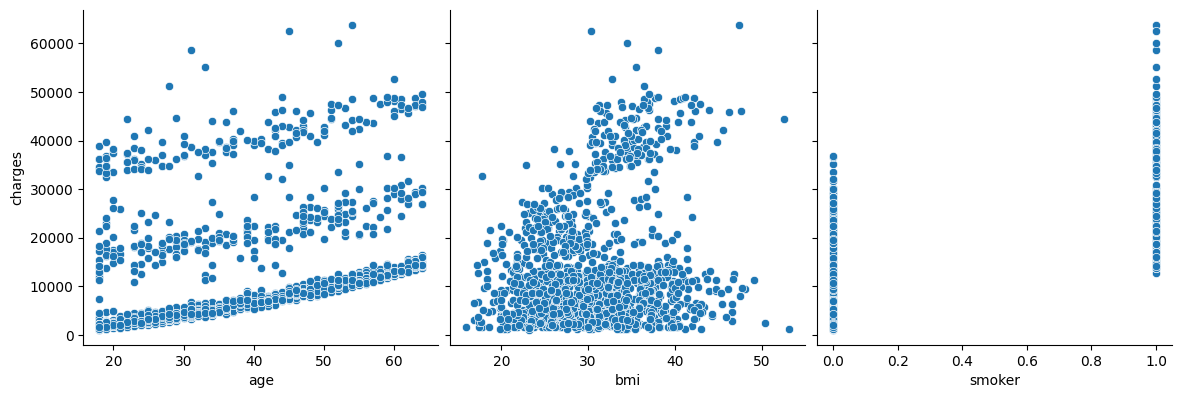

In [13]:
# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah variabel kategorikal menjadi numerik dengan One-Hot Encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), cmap="coolwarm", annot=True)
plt.show()

# Visualisasi Data dengan Pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'smoker'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

> **Identifikasi variabel bebas (fitur) dan variabel target (biaya medis personal)**
>
> **Variabel Target** : charges (biaya medis personal) </br>
>
> Berdasarkan hasil korelasi di atas **Variabel Bebas (Fitur)** yang dipilih :
> - age: karena cenderung memiliki korelasi positif terhadap biaya medis.
> - bmi: memiliki korelasi positif sedang, menunjukkan pengaruh terhadap biaya medis.
> - smoker: variabel smoker sangat berhubungan kuat dengan charges (karena orang yang merokok biasanya memiliki biaya medis lebih tinggi).
> </br> </br>

##### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [5]:
# Memisahkan variabel bebas (X) dan variabel target (y)
X = data[['age', 'bmi', 'smoker']]  # Variabel bebas
y = data['charges']  # Variabel target

# Import library yang diperlukan
from sklearn.model_selection import train_test_split

# Pembagian data latih dan data uji dengan proporsi 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

> </br> Pemilihan Variabel:
> - X berisi variabel bebas (age, bmi, smoker), sedangkan y adalah variabel target (charges).
>
> Pembagian Dataset:
> - Fungsi *train_test_split* membagi data menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan proporsi 80% untuk data latih dan 20% untuk data uji. *random_state=42* memastikan hasil yang konsisten setiap kali kode dijalankan.
> </br> </br>

##### 3. Lakukan feature scaling jika diperlukan.

In [6]:
# Import library yang diperlukan
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> </br>Kode program di atas menggunakan StandardScaler untuk menstandarisasi fitur sehingga setiap fitur memiliki mean 0 dan standar deviasi 1. Proses ini dilakukan pada data latih (X_train) dengan menghitung mean dan deviasi standar dari data latih, dan kemudian menerapkan skala yang sama pada data uji (X_test).
> </br> </br>

##### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [7]:
# Import library yang diperlukan
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model = LinearRegression()

> </br> Kode program di atas digunakan untuk membuat model regresi linear. Model regresi linear ini akan digunakan untuk memprediksi nilai target (charges) berdasarkan variabel bebas (age, bmi, smoker).
> </br> </br>

##### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [8]:
# Import library yang diperlukan
from sklearn.linear_model import LinearRegression

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan beberapa hasil prediksi
print("Prediksi untuk data uji (5 data pertama):", y_pred[:5])

Prediksi untuk data uji (5 data pertama): [ 8184.0414679   7431.00100108 37346.43709938  8629.52830485
 27316.65481023]


> </br> Kode program di atas digunakan untuk melatih model regresi linear dan membuat prediksi. Pertama, LinearRegression diimpor dan diinstansiasi sebagai objek model. Model kemudian dilatih dengan data latih (X_train dan y_train) menggunakan metode fit(). Setelah pelatihan, model digunakan untuk memprediksi nilai target pada data uji (X_test) dengan metode predict(). Terakhir, lima hasil prediksi pertama ditampilkan untuk menilai performa model pada data uji.
> </br> </br>

##### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [9]:
# Import library yang diperlukan
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menampilkan hasil evaluasi
print("R-squared:", r2)
print("MSE:", mse)
print("MAE:", mae)

R-squared: 0.7776932310583375
MSE: 34512843.880227886
MAE: 4260.560091099392


> </br> Kode program di atas digunakan untuk mengevaluasi kinerja model regresi linear dengan menghitung tiga metrik evaluasi utama: R-squared, Mean Squared Error (MSE), dan Mean Absolute Error (MAE).
>
> - Menghitung R-squared: r2 = r2_score(y_test, y_pred) mengukur seberapa baik model menjelaskan variansi data target (y_test), dengan nilai lebih dekat ke 1 menunjukkan model yang lebih baik.
>
> - Menghitung MSE: mse = mean_squared_error(y_test, y_pred) menghitung rata-rata kuadrat selisih antara nilai yang diprediksi dan nilai aktual, dengan nilai lebih kecil menunjukkan kesalahan model yang lebih rendah.
>
> - Menghitung MAE: mae = mean_absolute_error(y_test, y_pred) menghitung rata-rata selisih absolut antara nilai yang diprediksi dan nilai aktual, juga menunjukkan seberapa akurat model.
> </br> </br>